In [18]:
import os
from collections import Counter
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
email = pd.read_csv('emails.csv')

In [20]:
email.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
from bs4 import BeautifulSoup
from nltk import word_tokenize, WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def purify_text(message):
    soup = BeautifulSoup(message)
    text =  soup.get_text()
    text = text.replace("\n", " ").replace("/", "").replace("|", "").replace("http", "").replace(':', "").replace('\t', "").replace("Subject", "").replace('re', "").strip()
    tokens = word_tokenize(text)
    temp = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    return ' '.join(temp)

email['text'] = email['text'].apply(purify_text)

In [22]:
email.head()

,Unnamed: 0,label,text,label_num
0,605,ham,enron methanol ; meter # 988291 this is a foll...,0
1,2349,ham,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,ham,"neon tat ho ho ho , we ' around to that most w...",0
3,4685,spam,"photoshop , window , office . cheap . main tnd...",1
4,2030,ham,indian spring this deal is to book the teco pv...,0


In [33]:
sms = pd.read_csv('sms.csv')

In [34]:
sms.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [35]:
sms['text']=sms['text'].apply(purify_text)

In [36]:
sms.head()

,Unnamed: 0,label,text,label_num
0,605,ham,enron methanol ; meter # 988291 this is a foll...,0
1,2349,ham,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,ham,"neon tat ho ho ho , we ' around to that most w...",0
3,4685,spam,"photoshop , window , office . cheap . main tnd...",1
4,2030,ham,indian spring this deal is to book the teco pv...,0


In [37]:
df_final=email.merge(sms,how='outer')

In [38]:
df_final.head()

,Unnamed: 0,label,text,label_num
0,605,ham,enron methanol ; meter # 988291 this is a foll...,0
1,2349,ham,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,ham,"neon tat ho ho ho , we ' around to that most w...",0
3,4685,spam,"photoshop , window , office . cheap . main tnd...",1
4,2030,ham,indian spring this deal is to book the teco pv...,0


In [39]:
df_final.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,put the 10 on the ft the transport volume deca...,0
5167,404,ham,3 4 2000 and following noms hpl can ' t take t...,0
5168,2933,ham,"calpine daily gas nomination > > julie , a i m...",0
5169,1409,ham,industrial worksheet for august 2000 activity ...,0
5170,4807,spam,important online banking alert dear valued cit...,1


In [40]:
df_final = df_final.sample(frac=1).reset_index(drop=True)

In [41]:
df_final.tail()

,Unnamed: 0,label,text,label_num
5166,3444,ham,conoco - big cowboy darn i ' m not su if you c...,0
5167,1316,ham,sumes sent i sent you a stack of risk candidat...,0
5168,1201,ham,fyi - - - - - - - - - - - - - - - - - - - - - ...,0
5169,2589,ham,eol deal id in path manager thought you might ...,0
5170,1009,ham,"atmic hurta # 1 - new production vance , deal ...",0


In [42]:
df=df_final.copy()

### Visualizing the data

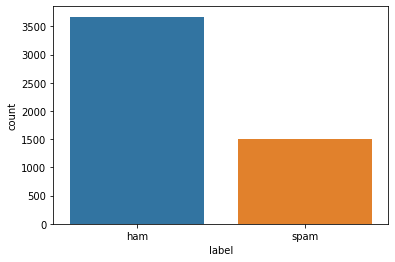

In [44]:
sns.countplot(df['label'])

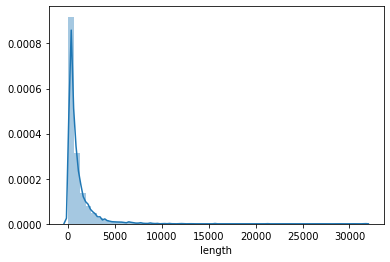

In [46]:
df['length'] = df['text'].apply(len)
sns.distplot(df['length'])

In [48]:
df[df['length']>2500]['label'].value_counts() #.count()

ham     260
spam    189
Name: label, dtype: int64

In [49]:
for index in df[df['length']>2500].index.tolist():
    df.drop(index=index, axis=1, inplace=True)
    

it drops index greater than 2500

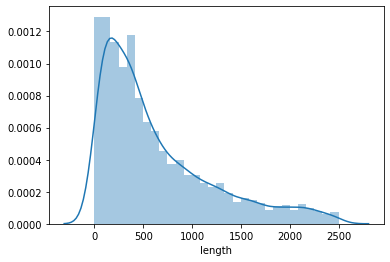

In [50]:
df['length'] = df['text'].apply(len)
sns.distplot(df['length'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001582FBAB688>,
      dtype=object)

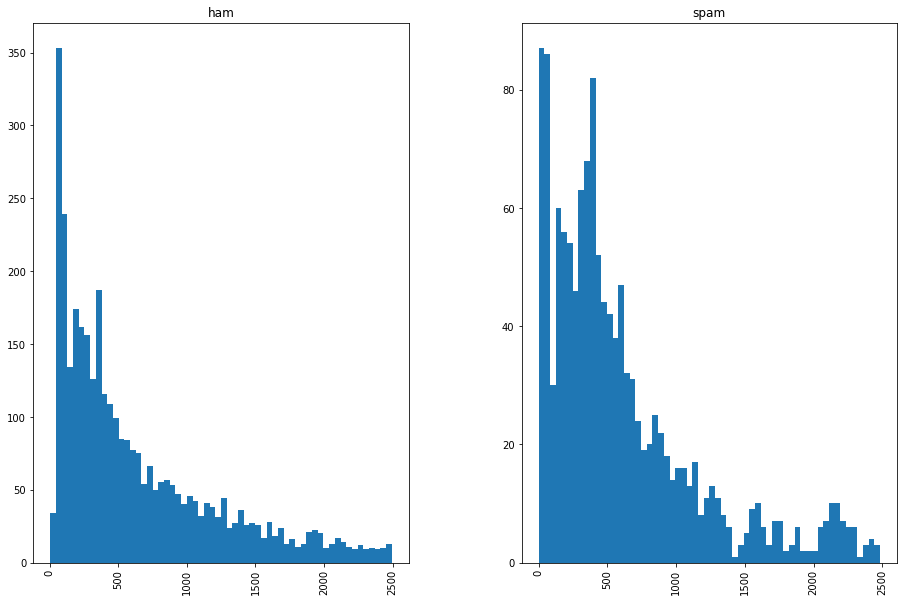

In [52]:
df.hist('length', by='label', figsize=(15, 10), bins=60)

### Applying NLP; BOW, TF-IDF

In [53]:
import string
from nltk.corpus import stopwords
def text_process(message):
    noPunc = [char for char in message if char not in string.punctuation]
    noPunc = ''.join(noPunc)
    
    return [word for word in noPunc.split() if word not in stopwords.words('english')]

punctuation are like , : ?


In [55]:
df['text'] = df['text'].apply(text_process)

In [56]:
df['text']

0       [meter, 1517, 12, 99, meter, 1517, sweeny, phi...
1       [glad, met, totally, awesome, city, city, guid...
2       [boxcar, plutarch, roof, using, product, 4, mo...
3       [potential, volume, list, march, 2000, fyi, we...
4       [eastrans, nomination, change, effective, 8, 4...
                              ...                        
5166    [conoco, big, cowboy, darn, su, help, know, el...
5167    [sumes, sent, sent, stack, risk, candidate, su...
5168    [fyi, forwarded, david, baumbach, hou, ect, 07...
5169    [eol, deal, id, path, manager, thought, might,...
5170    [atmic, hurta, 1, new, production, vance, deal...
Name: text, Length: 4722, dtype: object

In [57]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

for every space ' ' , lamda joins each text in text like it removes comma n spaces

In [60]:
df['text']

0       meter 1517 12 99 meter 1517 sweeny phillips ha...
1       glad met totally awesome city city guide chic ...
2       boxcar plutarch roof using product 4 month inc...
3       potential volume list march 2000 fyi well come...
4       eastrans nomination change effective 8 4 00 pl...
                              ...                        
5166    conoco big cowboy darn su help know else ask a...
5167    sumes sent sent stack risk candidate sumes int...
5168    fyi forwarded david baumbach hou ect 07 17 200...
5169    eol deal id path manager thought might want se...
5170    atmic hurta 1 new production vance deal 303948...
Name: text, Length: 4722, dtype: object

In [75]:
df.head()

,label,text
0,ham,meter 1517 12 99 meter 1517 sweeny phillips ha...
1,spam,glad met totally awesome city city guide chic ...
2,spam,boxcar plutarch roof using product 4 month inc...
3,ham,potential volume list march 2000 fyi well come...
4,ham,eastrans nomination change effective 8 4 00 pl...


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['text'])

In [86]:
print(len(bow_transformer.vocabulary_))

32892


In [87]:
message_bow = bow_transformer.transform(df['text'])

In [88]:
sparsity = (100.0 * message_bow.nnz/(message_bow.shape[0] * message_bow.shape[1]))
print('sparsity {}'.format(sparsity))

sparsity 0.15003410079567836


In [89]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_bow = TfidfTransformer().fit(message_bow)

In [90]:
message_tfidf = tfidf_transformer_bow.transform(message_bow)

In [91]:
from sklearn.naive_bayes import MultinomialNB

def buildClassifier(alpha):
    text_classifier = MultinomialNB(alpha=alpha)
    return text_classifier

### Making the pipeline, making it production ready!

In [92]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('vec', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB(alpha=0.01))])

#### Grid Search for best parameters.

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameters = {'clf__alpha': (0.00001, 0.0001, 0.001, 0.01, 0.1, 0.8, 0.9, 1)}
grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='accuracy', cv=10, verbose=1)

In [95]:
grid_search.fit(df['text'], df['label'])
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   44.3s finished


In [96]:
best_parameters

{'clf__alpha': 0.01}

In [97]:
best_accuracy

0.9822087648260294

In [98]:
pipeline = Pipeline([('vec', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB(alpha=0.1))])

In [99]:
pipeline.fit(df['text'], df['label'])

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.1))])

In [104]:
input_word = ['Download this app for free music']
input_word = text_process(input_word)
input_word = [' '.join(input_word)]
pipeline.predict(input_word)

array(['ham'], dtype='<U4')

#### Saving the Pipeline to be integrated in our web-app

In [101]:
import pickle
filename = 'textClf.pkl'
pickle.dump(pipeline, open(filename, 'wb'))